### Importing the libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [44]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head(n=10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [45]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [46]:
# In SVR we do not have an explicit closed-form expression for our model
# with coefficients to scale our features automatically
# Instead, SVR offers an implicity-defined model so we need
# to manually scale our features before training the model

# We do not have a split between training and testing set
# so we will apply feature scaling to the entire matrix of features
# Our dependent variable is continuous with values from
# 45000 to 10^6. Hence we apply feature scaling
from sklearn.preprocessing import StandardScaler

# The StandardScaler class expects a 2D array so we need
# to reshape y to a 2D array

y = y.reshape(len(y), 1) # reshape y into a 2D array len(y) x 1
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [47]:
sc_x = StandardScaler()
sc_y = StandardScaler() 
# 2 different standard scalers because each standard 
# scalers makes statstical calculations on its corresponding 
# input
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)
print(X), print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


(None, None)

### Training the SVR Model on the Whole Dataset

In [50]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf") # We use radial basis function kernel
regressor.fit(X, y)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting a new result

In [51]:
# Suppose a new employee had employment level 6.5
# we want to predict their salary
# Any input value must first be SCALED 
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

# Expected salary is approx. $170,370.00
# This makes sense when looking at our dataset

array([170370.0204065])

In [56]:
print(X), print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


(None, None)

### Visualizing the SVR model results

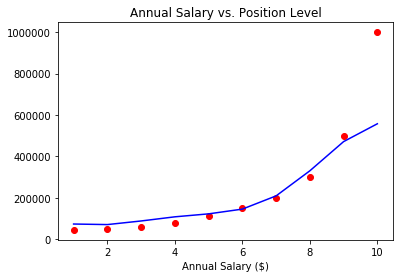

In [61]:
y_pred = sc_y.inverse_transform(regressor.predict(X))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_x.inverse_transform(X), y_pred, color="blue")
plt.xlabel("Position Level")
plt.xlabel("Annual Salary ($)")
plt.title("Annual Salary vs. Position Level")
plt.show()

# model is pretty accurate until position level 10

### Visualizing the SVR model results (higher dimension)

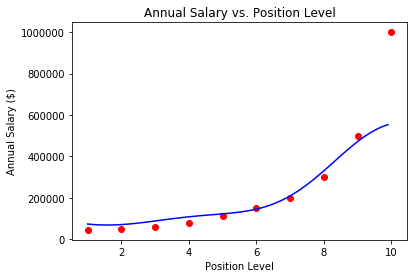

In [60]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))), color = 'blue')
plt.title("Annual Salary vs. Position Level")
plt.xlabel("Position Level")
plt.ylabel("Annual Salary ($)")
plt.show()

# We obtain a smoother curve, but the model is inaccurate for
# position level 10